In [2]:
import numpy as np
import pandas as pd

In [5]:
dataset = pd.read_csv("train_v9rqX0R.csv")

In [7]:
df = dataset.copy()

In [34]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [42]:
obj_cols = df.columns[df.dtypes == "object"]

In [47]:
int_cols = df.columns[df.dtypes == ("int64" and "float64")]
int_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [44]:
int_cols
# obj_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [48]:
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [45]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [82]:
df["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

Checking for skewness if any.

<Axes: >

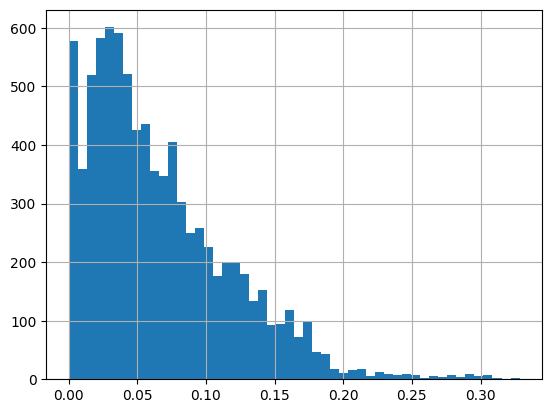

In [72]:
df["Item_Visibility"].hist(bins=50)

Making a log of visibility histogram to check for skewness and then we'll try and remove it

<Axes: >

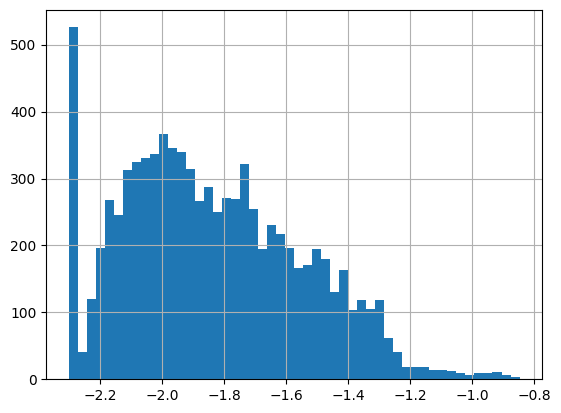

In [80]:
check_skew_itmvisi = np.log(df["Item_Visibility"]+0.1)
check_skew_itmvisi.hist(bins=50)

A skewness is clearly visibile in log funciton too

### Lets try and remove this skewness

<Axes: >

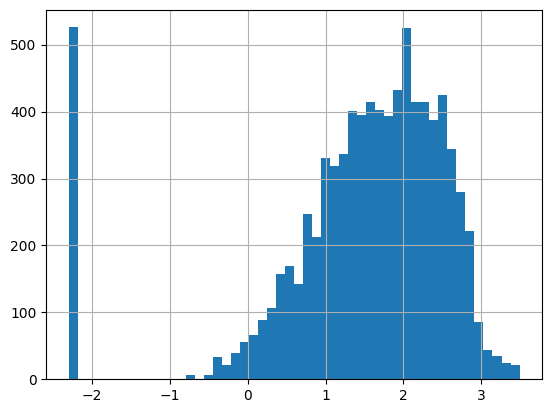

In [81]:
not_skewd_check = df["Item_Visibility"]*100
not_skewd_check_log = np.log(not_skewd_check + 0.1)
not_skewd_check_log.hist(bins = 50)

In [74]:
visibility = df["Item_Visibility"]*100

In [76]:
type(visibility)

pandas.core.series.Series

<Axes: >

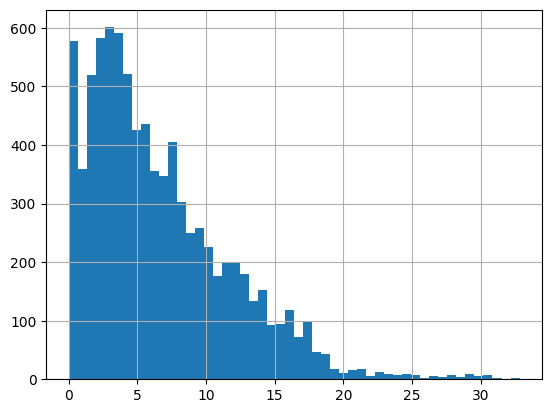

In [75]:
visibility.hist(bins=50)

Making a histogram of log values of visibility

this will probably not be skewed because the values are 0.016 type and then multiplying them by 100 gives us values in granuality(steps) 1 and then taking a log and adding 1 to it so that the log(0) error is skipped creates a significance difference.


refer this

Yes, your understanding is correct. The difference in the impact on skewness between adding +0.1 and +1 to the data lies in the granularity or step size of the original data.

When you have a column like "Item_Visibility" with values like 0.016047, 0.019278, etc., and you multiply them by 100, you get values like 1.6047, 1.9278, and so on. The addition of +0.1 in this case is relatively small compared to the scale of the data. Adding +0.1 doesn't change the order of magnitude of the values significantly, and it's a relatively minor adjustment.

On the other hand, when you add +1 to the original values (after multiplying by 100), you are making a larger adjustment. If your original values are in the order of 0.01 to 0.02, adding +1 makes a substantial change to the scale of the data. This shift can impact the skewness of the data, especially if the original data has a distribution with a peak at or close to zero.

In the case where your original data is already relatively small (in the range of 0.01), adding +1 can have a more pronounced effect on the distribution and may result in a change in skewness. It effectively shifts the entire distribution to the right.

The choice between adding +0.1 and +1 depends on the scale and nature of your data and the specific transformation you're trying to achieve. It's a common practice to use a small constant like +0.1 to stabilize the transformation and handle cases where you have zero values (to avoid undefined results when taking the logarithm). However, the choice of the constant can depend on the specific characteristics of your data and the goals of your analysis.

<Axes: >

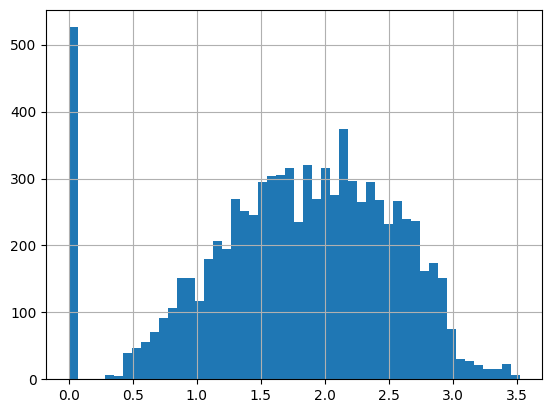

In [77]:
log_visibility = np.log(visibility + 1)
log_visibility.hist(bins = 50)

Lets describe the col item_visbility once and check about the values

In [59]:
df["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

<Axes: >

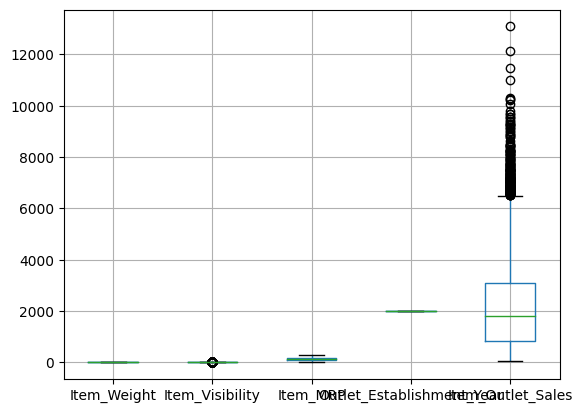

In [66]:
df.boxplot()

<Axes: >

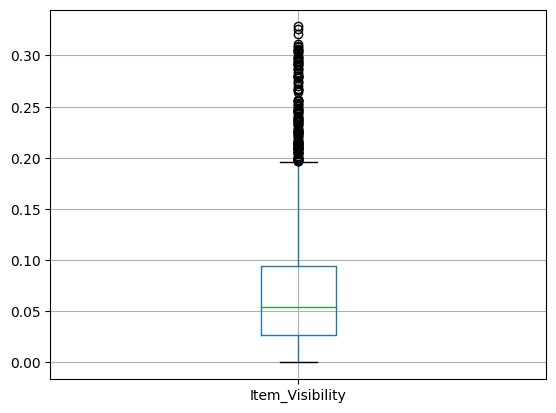

In [65]:
df.boxplot(column="Item_Visibility")

Right skewed data, hence we can apply any one out of these:
1. Logarithm
2. Square / cube
3. Square root / cube root
4. Reciprocal

In [51]:
item_visibility_sqrt = np.sqrt(df["Item_Visibility"])

Now we can see that the skewness went off because we used a sqrt function


<Axes: >

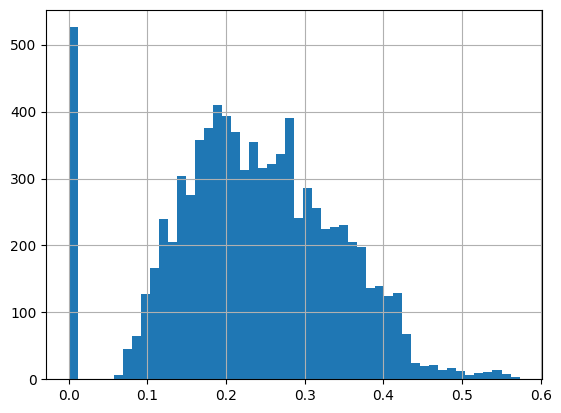

In [53]:
item_visibility_sqrt.hist(bins = 50)

Taking a log of the same item_visibilty and then we'll check for skewness


In [57]:
item_visibility_log = np.log(df["Item_Visibility"]+0.1)

<Axes: >

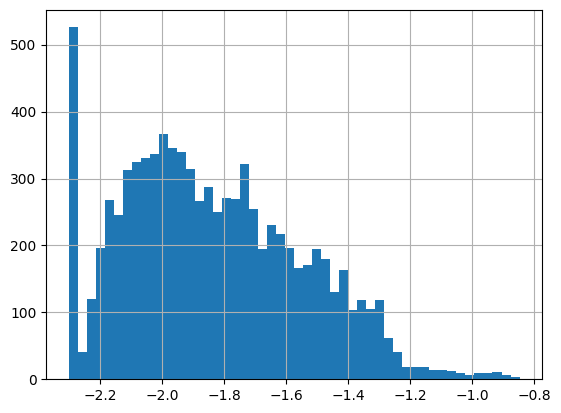

In [67]:
item_visibility_log.hist(bins=50)

In [69]:
visibility = df["Item_Visibility"]*100

<Axes: >

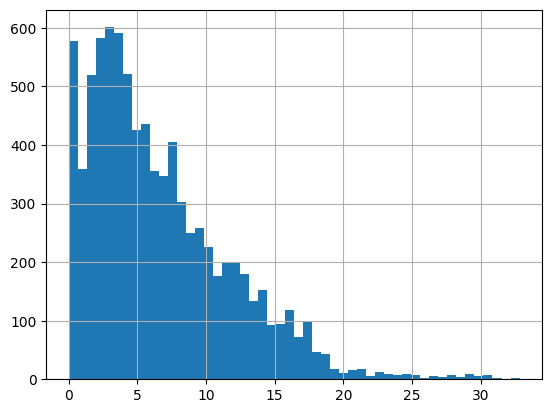

In [71]:
visibility.hist(bins=50)